# **Projektarbeit: Vorhersage von Medikamentenverschreibungen basierend auf Patienteneigenschaften**

**Kurs:** Maschinelles Lernen (MaLe-AD23-HS24)  

**Autor/in:** Elisabeth Hermann

**Datum:** 23.12.2024


---

## **Einführung**


### Zusammenfassung des Projektinhalts

- **Welches Problem wird gelöst?**  
  Es soll ein Modell entwickelt werden, das anhand von Patientendaten (Alter, Geschlecht, Blutdruck, Cholesterinspiegel und Natrium-Kalium-Verhältnis im Blut) vorhersagt, welches Medikament (Drug A, B, C, X oder Y) für einen Patienten am besten geeignet ist. 

- **Welche Daten werden verwendet?**  
  Das "Drug Classification Dataset", das 200 Patienteninformationen enthält, die Merkmale wie Alter, Geschlecht, Blutdruck (hoch/niedrig), Cholesterin (hoch/normal) und Natrium-Kalium-Verhältnis umfassen.

- **Welches ist die Zielvariable?**  
  Die Zielvariable ist `Drug`, die das Medikament angibt, das bei einem Patienten verabreicht wird.

- **Welche Features werden verwendet?**  
  - `Alter (Age)`, in Jahren
  - `Geschlecht (Sex)`, F oder M
  - `Blutdruck (BP)`, low, high oder normal
  - `Cholesterinspiegel (Cholesterol)`, normal oder high
  - `Natrium-Kalium-Verhältnis (Na_to_K)`, Index 

- **Andere nützliche Informationen:**  
  Das Problem ist eine Klassifikationsaufgabe im Bereich des überwachenden Lernens. 


## Der Datensatz
**Wieso ist es sinnvoll, dieses Problem zu lösen?**

  Die richtige Medikamentenwahl ist entscheidend für den Heilungsprozess eines Patienten. Ein Modell, das anhand von Patientendaten die beste Medikamentenwahl vorhersagen kann, kann Ärzten dabei helfen, die richtige Entscheidung zu treffen und die Genesung der Patienten zu beschleunigen. Heute in unserer Welt die immer mehr von Technologie geprägt ist, ist es wichtig, dass auch im medizinischen Bereich Technologie eingesetzt wird, um die Genesung der Patienten zu beschleunigen und die richtige Behandlung zu gewährleisten. Auch die Kosten für die Behandlung können durch die richtige Medikamentenwahl gesenkt werden.

**Eventuelle Einschränkungen des Datensatzes**

  Der Datensatz ist relativ klein und enthält nur 200 Patienteninformationen. Dies könnte die Leistung des Modells beeinträchtigen. Auch de Anzahl der Features ist begrenzt, was die Vorhersagegenauigkeit des Modells beeinflussen könnte. 

---
## **Setup**

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from skimpy import skim
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, RobustScaler, label_binarize
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score, PrecisionRecallDisplay
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.multiclass import OneVsRestClassifier

Our color palette:


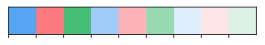

In [4]:
# Basic imports
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Enable vectorized graphics
%config InlineBackend.figure_formats = ["svg"]

# Setup plotting
PALETTE = [ (0.341, 0.648, 0.962, 1.0), 
            (0.990, 0.476, 0.494, 1.0), 
            (0.281, 0.749, 0.463, 1.0), 
            (0.629, 0.802, 0.978, 1.0), 
            (0.994, 0.705, 0.715, 1.0), 
            (0.595, 0.858, 0.698, 1.0), 
            (0.876, 0.934, 0.992, 1.0), 
            (0.998, 0.901, 0.905, 1.0), 
            (0.865, 0.952, 0.899, 1.0) ]

# For more color palettes, see here:
# https://seaborn.pydata.org/tutorial/color_palettes.html
# https://matplotlib.org/stable/users/explain/colors/colormaps.html
#PALETTE = sns.color_palette("husl", 8)
#PALETTE = sns.color_palette("viridis", 10)

print("Our color palette:")
sns.palplot(PALETTE, size=0.5)

# Matplotlib und Seaborn konfigurieren
sns.set_style("whitegrid")
plt.rcParams["figure.dpi"] = 300
plt.rcParams["axes.prop_cycle"] = plt.cycler(color=sns.color_palette("muted", 5))


---
## **Präprozessierung**



**Daten einlesen**  
Zuerst werden die Daten aus einer CSV-Datei namens **drug200.csv** eingelesen. 

**Überblick und statistische Beschreibung**  
Nach dem Einlesen der Daten wird eine Vorschau des Datensatzes angezeigt, um einen Überblick zu erhalten. Anschliessend werden die statistischen Informationen und Zusammenfassungen der Daten angezeigt. Ausserdem wird geprüft, ob fehlende Werte in den Daten vorhanden sind.

**Trennung von Zielvariable und Features**  
Die Zielvariable **Drug** wird von den Features getrennt. Die Zielvariable wird in **y** gespeichert. 

**Kodierung kategorischer Variablen**  
Die kategorischen Variablen (**Sex**, **BP**, **Cholesterol**) werden mittels OneHot-Encoding kodiert. Dies ist notwendig, da maschinelles Lernen Algorithmen numerische Eingaben benötigen und kategoriale Daten in einem Format vorliegen, das diese Algorithmen nicht direkt verarbeiten können.

**Skalierung kontinuierlicher Variablen**  
Die numerischen Variablen (**Age** und **Na_to_K**) werden skaliert. Hier wird der **RobustScaler** verwendet,der robust gegenüber Ausreissern in den Daten ist. Dies ist wichtig, um sicherzustellen, dass die numerischen Features auf einer ähnlichen Skala liegen und der Einfluss von Ausressern minimiert wird. Aber auch andere Skalierer wie **StandardScaler** oder **MinMaxScaler** könnten verwendet werden, wurden auch getestet und der Vollständigkeit halber im Skript belassen, aber auskommentiert.

**Zusammenführen der Features**  
Danach werden die skalierten numerischen Daten und die kodierten kategorischen Daten zu einem einzigen Datensatz zusammengeführt. Dieser finale Datensatz **X** enthält.


In [5]:
# Daten einlesen
df = pd.read_csv('drug200.csv')

# Erster Überblick über die Daten
print("Datensatz Vorschau:")
display(df.head())
print("Datenzusammenfassung:")
df.info()
print("Statistische Beschreibung:")
display(df.describe())


Datensatz Vorschau:


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


Datenzusammenfassung:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB
Statistische Beschreibung:


,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [6]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [7]:
# Zielvariable und Features trennen
y = df['Drug']
categorical_features = ['Sex', 'BP', 'Cholesterol']
numeric_features = ['Age', 'Na_to_K']


## Kategorische Variablen kodieren

In [8]:
# OneHot-Encoding für kategorische Variablen
encoder = OneHotEncoder(sparse_output=False)
df_categorical_encoded = pd.DataFrame(
    encoder.fit_transform(df[categorical_features]),
    columns=encoder.get_feature_names_out(categorical_features)
)

## Kontinuierliche Variablen skalieren

In [9]:
# Skalierung der numerischen Features
# scaler = MinMaxScaler()
# scaler = StandardScaler()
scaler = RobustScaler()

df_numeric_scaled = pd.DataFrame(
    scaler.fit_transform(df[numeric_features]),
    columns=numeric_features
)

## Zusammenführen der Features

In [10]:
X = pd.concat([df_numeric_scaled, df_categorical_encoded], axis=1)
X.head()

,Age,Na_to_K,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,-0.814815,1.278023,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.074074,-0.094409,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.074074,-0.427836,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,-0.629630,-0.687056,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.592593,0.459623,1.0,0.0,0.0,1.0,0.0,1.0,0.0


---

## **Explorative Datenanalyse**

**Verteilung der Zielvariable**  
Zur Darstellung der Verteilung der Zielvariablen **Drug** wird ein Balkendiagramm verwendet.

**Verteilung der numerischen Variablen**  
Für jede numerische Variable werden Histogramme erstellt, um ihre Verteilung zu analysieren. Zusätzlich wird die Dichtefunktion (`kde`) in den Histogrammen dargestellt, um die Form der Verteilung besser erkennen zu können.

**Kategorische Variablen**  
Für kategoriale Variablen, werden Balkendiagramme verwendet, um ihre Verteilung in Bezug auf die Zielvariable **Drug** darzustellen.
Für jede Kategorie der Zielvariable **Drug** wird eine separate Korrelationsmatrix berechnet und mittels einer Heatmap visualisiert. Dies hilft, die Beziehungen zwischen den Variablen innerhalb jeder Drug-Kategorie zu verstehen. Die leeren Felder sind kategorische Variablen, die in der jeweiligen Arzneimittelkategorie nicht vorkommen bzw. keine unterschiedlichen Werte haben.

Boxplots visualisieren die Beziehung zwischen den numerischen Variablen Na_to_K und Age und der Zielvariable Drug, während ein Paarplot paarweise Beziehungen zwischen den Variablen darstellt und Kreuztabellen Balkendiagramme für die Beziehungen zwischen den kategorischen Variablen BP und Cholesterol und der Zielvariable Drug erstellen.


## Zielvariable analysieren

Text(0.5, 1.0, 'Verteilung der Zielvariable (Drug)')

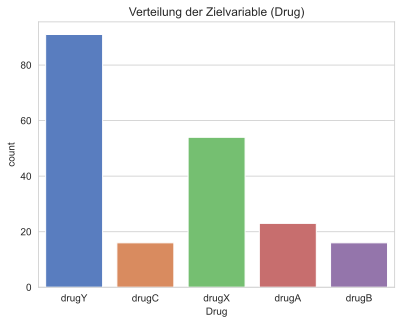

In [11]:
# Verteilung der Zielvariable
sns.countplot(x='Drug', data=df, hue = 'Drug')
plt.title("Verteilung der Zielvariable (Drug)")

## Verteilung der Features analysieren

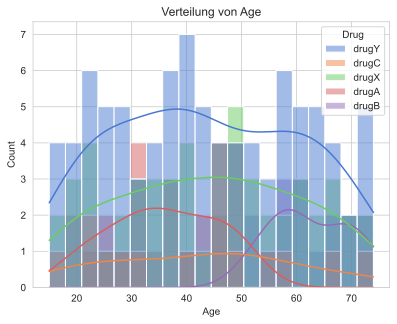

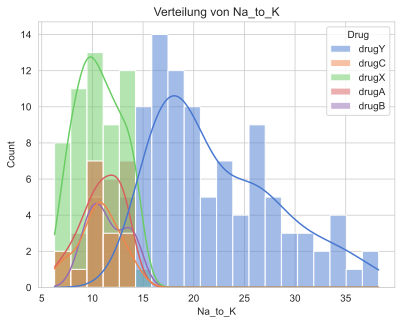

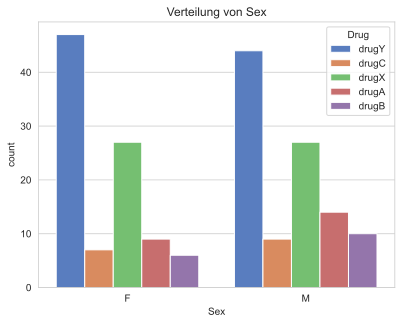

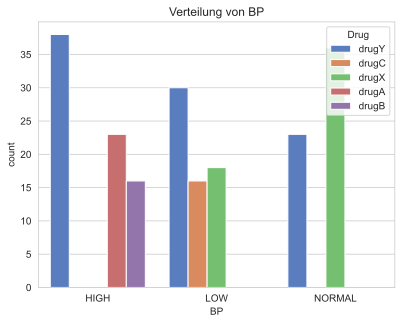

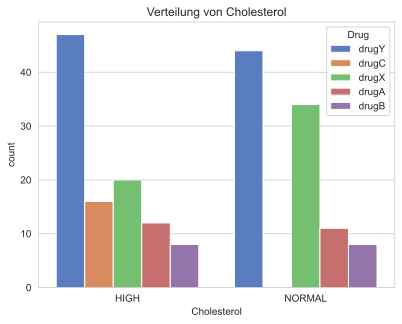

In [12]:
# Verteilung der numerischen Variablen
for feature in numeric_features:
    sns.histplot(data=df, x=feature, kde=True, bins=20, hue='Drug')
    plt.title(f"Verteilung von {feature}")
    plt.show()

# Kategorische Variablen
for feature in categorical_features:
    sns.countplot(x=feature, data=df, hue='Drug')
    plt.title(f"Verteilung von {feature}")
    plt.show()


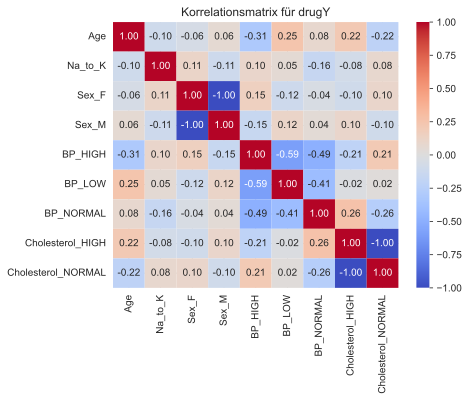

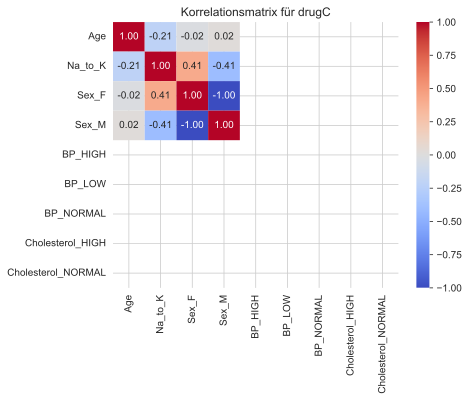

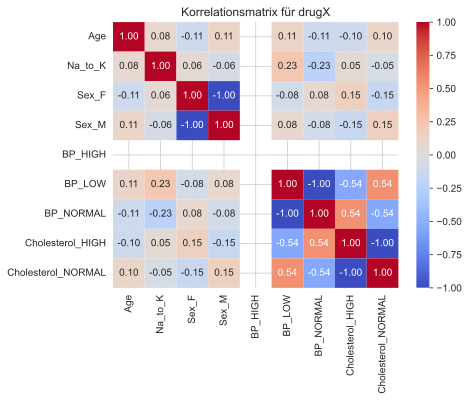

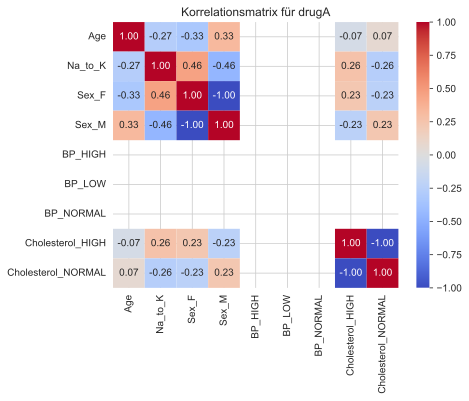

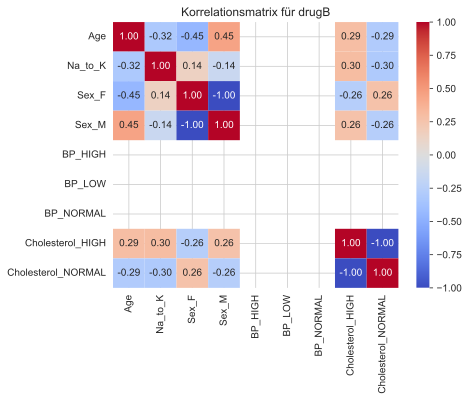

In [13]:
# Für jede Drug-Kategorie eine eigene Korrelationsmatrix berechnen und plotten
drug_categories = df['Drug'].unique()

for drug in drug_categories:
    df_drug = df[df['Drug'] == drug]
    df_drug_encoded = pd.concat([df_drug[numeric_features], df_categorical_encoded[df['Drug'] == drug]], axis=1)
    
    correlation_matrix = df_drug_encoded.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f"Korrelationsmatrix für {drug}")
    plt.show()

# Korrelationsmatrix mit Drug-Kategorien

Korrelationsmatrix:


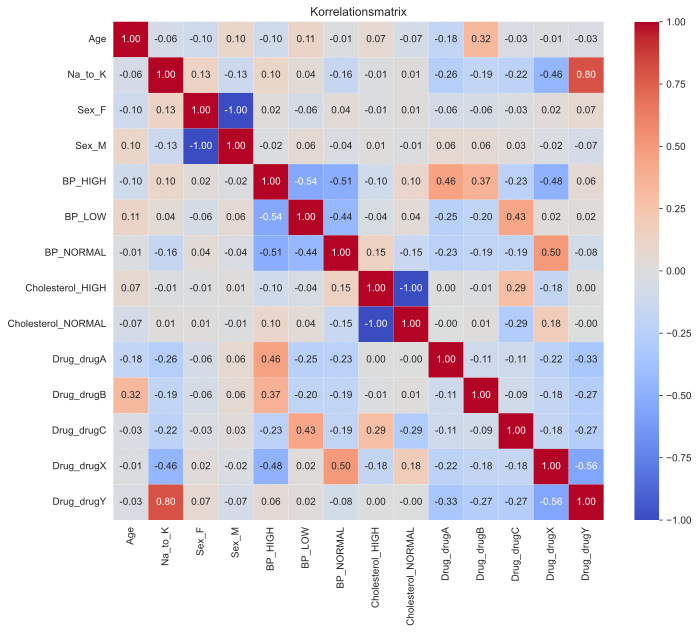

In [14]:
# Korrelationsmatrix für den gesamten Datensatz berechnen und plotten

# Numerische Features in neue Variable speichern
numerical_features_drug = ['Age', 'Na_to_K']

# Zielvariable in numerische Werte umwandeln
df_drug_encoded = pd.get_dummies(df['Drug'], prefix='Drug') 
# Daten zusammenführen
df_encoded = pd.concat([df[numerical_features_drug], df_categorical_encoded, df_drug_encoded], axis=1)

# Korrelationsmatrix berechnen und plotten
correlation_matrix = df_encoded.corr()
plt.figure(figsize=(11, 9))
print("Korrelationsmatrix:")
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korrelationsmatrix")
plt.show()

## Beziehungen analysieren

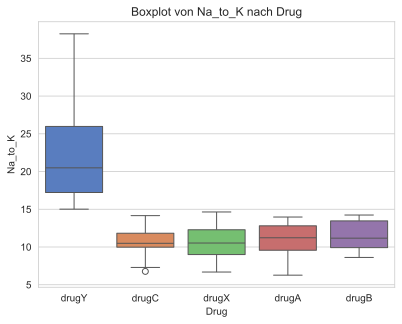

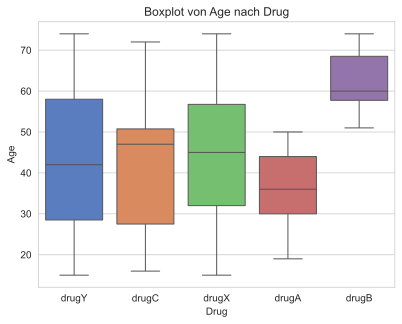

In [15]:
# Beziehung zwischen numerischen Variablen und Zielvariable
sns.boxplot(x='Drug', y='Na_to_K', data=df, hue='Drug')
plt.title("Boxplot von Na_to_K nach Drug")
plt.show()

sns.boxplot(x='Drug', y='Age', data=df, hue='Drug')
plt.title("Boxplot von Age nach Drug")
plt.show()

<Axes: xlabel='Cholesterol'>

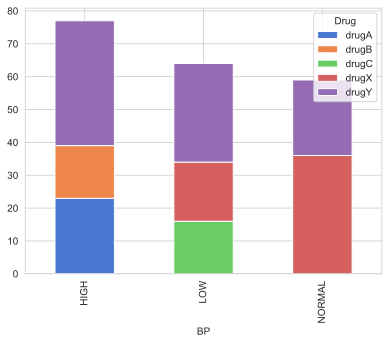

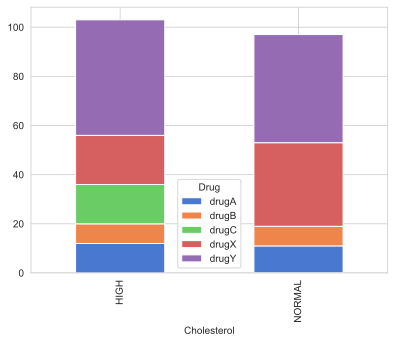

In [16]:
pd.crosstab(df['BP'], df['Drug']).plot(kind='bar', stacked=True)
pd.crosstab(df['Cholesterol'], df['Drug']).plot(kind='bar', stacked=True)

### skim und ProfileReport wurde durchgeführt, aber zur Übersichtlichkeit wieder auskommentiert

In [17]:
# skim(df)

In [18]:
# from ydata_profiling import ProfileReport
# profile = ProfileReport(df, 
#                         title="OUR DATASET", 
#                         sort=None,
#                         sensitive=False,
#                         explorative=False)

# # Create and display the report
# profile.to_notebook_iframe()    # Integrate into a Jupyter notebook
# #profile.to_widgets()             # Integrate into a Jupyter notebook, compact
# #profile.to_file("output.html")  # Save the report to a file
# profile

---

## **Feature Engineering und Dimensionalitätsreduktion**

Basierend auf Bluthochdruck und Cholesterin wird ein neues Feature `HighRisk` erstellt und visualisiert. Die Wichtigkeit der Feautures wird mittels Random Forest bestimmt und in einem Balkendiagramm dargestellt. Unwichtige Features werden entfernt, der reduzierte Datensatz wird angezeigt, und die Daten werden mit LDA analysiert, um die Klassifikationsgenauigkeit und die LDA-Scores zu visualisieren.

## HighRisk-Feature erstellen

Text(0.5, 1.0, 'Verteilung des HighRisk-Features')

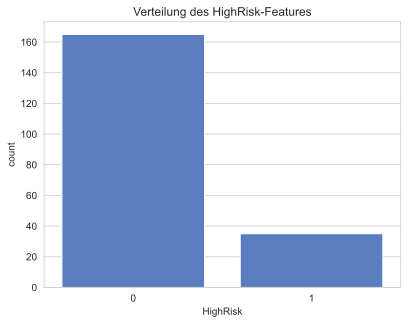

In [19]:
# Neues Feature HighRisk
df['HighRisk'] = ((df['BP'] == 'HIGH') & (df['Cholesterol'] == 'HIGH')).astype(int)

# Verteilung des neuen Features
sns.countplot(x='HighRisk', data=df)
plt.title("Verteilung des HighRisk-Features")


In [20]:
# HighRisk als kategorische Variable hinzufügen
df_categorical_encoded['HighRisk'] = df['HighRisk']
X = pd.concat([df_numeric_scaled, df_categorical_encoded], axis=1)

## Feature-Wichtigkeit berechnen und visualisieren

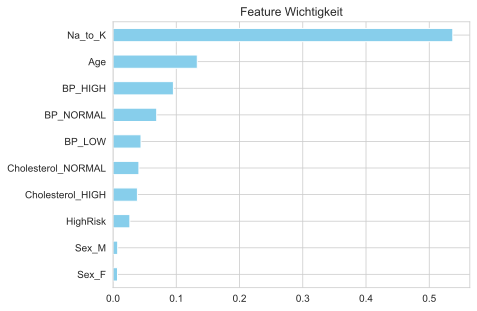

In [21]:
# Feature-Wichtigkeiten mit Random Forest berechnen
model = RandomForestClassifier(random_state=42)
model.fit(X, y)
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', color='skyblue')
plt.title("Feature Wichtigkeit")
plt.show()


## Dimensionalitätsreduktion aufgrund von Feature-Wichtigkeit

In [22]:
# Schwellenwert setzen
# threshold = 0.01
threshold = 0.05
important_features = importances[importances > threshold].index

# Reduzierte Features
X_reduced = X[important_features]
print("Verwendete Features nach Reduktion:", X_reduced.columns)


Verwendete Features nach Reduktion: Index(['Age', 'Na_to_K', 'BP_HIGH', 'BP_NORMAL'], dtype='object')


## LDA zur Dimensionalitätsreduktion

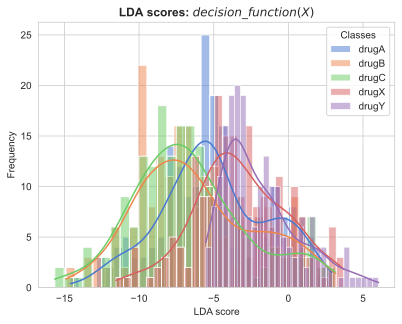

In [30]:
# Einzigartige Klassennamen aus y extrahieren
class_names = np.unique(y)

# LDA-Modell erstellen und anpassen
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)

# LDA-Scores berechnen
scores = lda.decision_function(X)

# LDA-Scores visualisieren
for i in range(scores.shape[1]):
    sns.histplot(scores[:, i], bins=30, kde=True, label=class_names[i])
plt.xlabel("LDA score")
plt.ylabel("Frequency")
plt.title("LDA scores: $decision\\_function(X)$", fontweight="bold")
plt.legend(title='Classes')
plt.show()

# Interpretation der LDA-Scores zur Übersichtlichkeit für den PDF-Export auskommentiert
# print("LDA-Scores für die Testdaten:")


---

## **Modellieren, Trainieren und Validieren**

## Trainings- und Testdaten aufteilen

In [24]:
#  Trainings- und Testdaten splitten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Trainingsdaten: {X_train.shape}, Testdaten: {X_test.shape}")

Trainingsdaten: (160, 10), Testdaten: (40, 10)


## Hyperparameter-Tuning

In [25]:
# Hyperparameter-Raster für Random Forest
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Random Forest mit GridSearch
rf_grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid=rf_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

rf_grid_search.fit(X_train, y_train)

# Bestes Modell und Genauigkeit
rf_best_model = rf_grid_search.best_estimator_
print(f"Beste Hyperparameter für Random Forest: {rf_grid_search.best_params_}")


Beste Hyperparameter für Random Forest: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [26]:
# Hyperparameter-Raster für SVM
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# SVM mit GridSearch
svm_grid_search = GridSearchCV(
    SVC(probability=True, random_state=42),
    param_grid=svm_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

svm_grid_search.fit(X_train, y_train)

# Bestes Modell und Genauigkeit
svm_best_model = svm_grid_search.best_estimator_
print(f"Beste Hyperparameter für SVM: {svm_grid_search.best_params_}")


Beste Hyperparameter für SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}


In [27]:
# Cross-Validation für Random Forest
rf_scores = cross_val_score(rf_best_model, X, y, cv=10)
rf_predictions = cross_val_predict(rf_best_model, X, y, cv=10)
rf_accuracy = accuracy_score(y, rf_predictions)
rf_mean = np.mean(rf_scores)
rf_std = np.std(rf_scores)

print(f"Random Forest Mean Accuracy (µ): {rf_mean:.4f}")
print(f"Random Forest Standard Deviation (σ): {rf_std:.4f}")

# Cross-Validation für SVM
svm_scores = cross_val_score(svm_best_model, X, y, cv=10)
svm_predictions = cross_val_predict(svm_best_model, X, y, cv=10)
svm_accuracy = accuracy_score(y, svm_predictions)
svm_mean = np.mean(svm_scores)
svm_std = np.std(svm_scores)

print(f"SVM Mean Accuracy (µ): {svm_mean:.4f}")
print(f"SVM Standard Deviation (σ): {svm_std:.4f}")


# LDA Vorhersagen
lda_y_pred = lda.predict(X_test)
print("LDA Accuracy:", accuracy_score(y_test, lda_y_pred))



Random Forest Mean Accuracy (µ): 0.9900
Random Forest Standard Deviation (σ): 0.0200
SVM Mean Accuracy (µ): 0.9750
SVM Standard Deviation (σ): 0.0403
LDA Accuracy: 0.925


Klassifikationsbericht für Random Forest:
              precision    recall  f1-score   support

       drugA       0.96      1.00      0.98        23
       drugB       1.00      0.94      0.97        16
       drugC       1.00      1.00      1.00        16
       drugX       1.00      0.98      0.99        54
       drugY       0.99      1.00      0.99        91

    accuracy                           0.99       200
   macro avg       0.99      0.98      0.99       200
weighted avg       0.99      0.99      0.99       200

Konfusionsmatrix für Random Forest:


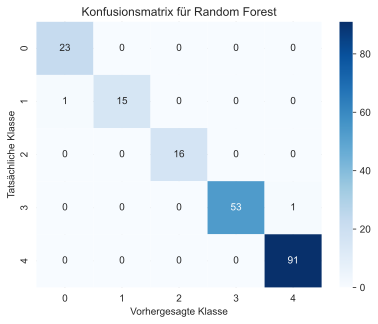

Klassifikationsbericht für SVM:
              precision    recall  f1-score   support

       drugA       0.96      1.00      0.98        23
       drugB       0.94      0.94      0.94        16
       drugC       0.94      1.00      0.97        16
       drugX       0.98      0.98      0.98        54
       drugY       0.99      0.97      0.98        91

    accuracy                           0.97       200
   macro avg       0.96      0.98      0.97       200
weighted avg       0.98      0.97      0.98       200

Konfusionsmatrix für SVM:


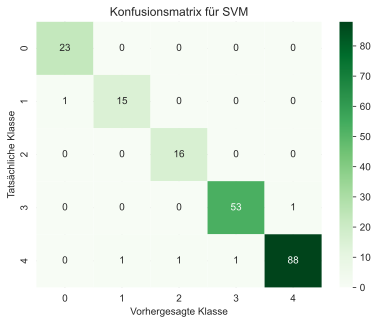

Klassifikationsbericht für LDA:
              precision    recall  f1-score   support

       drugA       0.75      1.00      0.86         6
       drugB       1.00      1.00      1.00         3
       drugC       0.83      1.00      0.91         5
       drugX       1.00      1.00      1.00        11
       drugY       1.00      0.80      0.89        15

    accuracy                           0.93        40
   macro avg       0.92      0.96      0.93        40
weighted avg       0.94      0.93      0.93        40

Konfusionsmatrix für LDA:


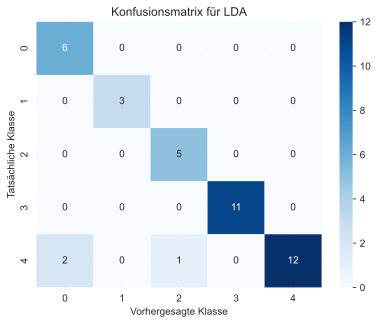

In [28]:
print("Klassifikationsbericht für Random Forest:")
print(classification_report(y, rf_predictions))

# Konfusionsmatrix und Klassifikationsbericht für Random Forest
print("Konfusionsmatrix für Random Forest:")
rf_cm = confusion_matrix(y, rf_predictions)
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Konfusionsmatrix für Random Forest')
plt.xlabel('Vorhergesagte Klasse')
plt.ylabel('Tatsächliche Klasse')
plt.show()


print("Klassifikationsbericht für SVM:")
print(classification_report(y, svm_predictions))

# Konfusionsmatrix und Klassifikationsbericht für SVM
print("Konfusionsmatrix für SVM:")
svm_cm = confusion_matrix(y, svm_predictions)
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Greens')
plt.title('Konfusionsmatrix für SVM')
plt.xlabel('Vorhergesagte Klasse')
plt.ylabel('Tatsächliche Klasse')
plt.show()


print("Klassifikationsbericht für LDA:")
print(classification_report(y_test, lda_y_pred))

# Konfusionsmatrix 
print("Konfusionsmatrix für LDA:") 
lda_cm = confusion_matrix(y_test, lda_y_pred) 
sns.heatmap(lda_cm, annot=True, fmt='d', cmap='Blues') 
plt.title('Konfusionsmatrix für LDA')
plt.xlabel('Vorhergesagte Klasse') 
plt.ylabel('Tatsächliche Klasse') 
plt.show()




## Warum Präzisions-Recall-Kurven und nicht ROC-Kurven?

**Fokus auf Positive Klasse**

Präzisions-Recall-Kurven konzentrieren sich auf die Leistung des Modells bezüglich der positiven Klasse. Das ist besonders wichtig in ungleich verteilten Datensätzen, wo einige Klassen möglicherweise nur wenige Datenpunkte haben. Was hier bei mir der Fall ist. Im Gegensatz dazu betrachten ROC-Kurven das Verhältnis von wahren Positiven zu allen negativen Fällen, was in ungleichen Datensätzen zu irreführenden Ergebnissen führen kann.

**Geringere Beeinflussung durch die Anzahl der wahren Negativen**

In vielen realen Anwendungen, besonders im medizinischen Bereich oder in der Textklassifikation, ist die Anzahl der Negativen (nicht relevante Fälle) viel höher als die der Positiven. ROC-Kurven können in solchen Fällen überoptimistisch erscheinen, da die hohe Anzahl von wahren Negativen die wahre Leistungsfähigkeit des Modells in Bezug auf die interessierende Klasse maskiert. Präzisions-Recall-Kurven sind von diesem Ungleichgewicht weniger beeinflusst, da sie sich nicht auf die wahren Negativen konzentrieren.

**Bessere Metrik bei geringer Positivrate**

In Situationen, wo die interessierenden Klassen selten sind (niedrige Positivrate), gibt die Präzision (der Anteil der korrekten positiven Vorhersagen an allen positiven Vorhersagen) und der Recall (der Anteil der korrekten positiven Vorhersagen an allen tatsächlichen Positiven) relevantere Informationen über die Leistung des Modells. Die ROC-Kurve könnte in solchen Fällen immer noch hohe Werte zeigen, selbst wenn das Modell viele falsche Negativ-Vorhersagen macht.

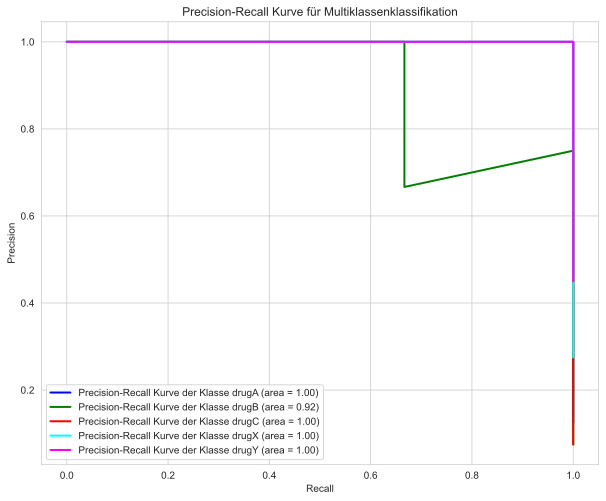

In [29]:
# Klassen binarisieren
classes = np.unique(y)
y_bin = label_binarize(y, classes=classes)
n_classes = y_bin.shape[1]

# Daten in Trainings- und Testsets aufteilen
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.2, random_state=42, stratify=y_bin)

# One-vs-Rest Strategie zur Multiklassenklassifikation
classifier = OneVsRestClassifier(RandomForestClassifier(random_state=42))
classifier.fit(X_train, y_train)

# Berechnenung der Präzisions-Recall-Kurve und die durchschnittliche Präzision für jede Klasse
precision = dict()
recall = dict()
average_precision = dict()

for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        classifier.predict_proba(X_test)[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], classifier.predict_proba(X_test)[:, i])

# Plot Präzisions-Recall-Kurve für jede Klasse
plt.figure(figsize=(10, 8))
for i, color in zip(range(n_classes), ['blue', 'green', 'red', 'cyan', 'magenta']):
    plt.plot(recall[i], precision[i], color=color, lw=2,
             label='Precision-Recall Kurve der Klasse {0} (area = {1:0.2f})'.format(classes[i], average_precision[i]))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Kurve für Multiklassenklassifikation')
plt.legend(loc="lower left")
plt.show()


---

## **Diskussion und Fazit**


### **Welches Datenmodell funktioniert am besten?**
- **Random Forest:**

    Das Modell zeigt eine fast perfekte Präzision, Recall und F1-Score in allen Klassen (drugA, drugB, etc.).
Dies deutet darauf hin, dass der Random Forest sehr effektiv bei der Erkennung von Mustern in den Daten ist. Die fast perfekte Leistung ist jedoch auch ein Zeichen dafür, dass das Modell möglicherweise overfitted ist.

- **SVM:**

    Die Genauigkeit (Accuracy) beträgt 0.9750 (± 0.0403) für die Kreuzvalidierung. Das Modell ist stabil, aber nicht so perfekt wie der Random Forest.
Insbesondere in kleineren Klassen wie drugB zeigt die SVM eine leichte Schwäche gegenüber Random Forest, was sich in leicht niedrigeren Präzisionswerten zeigt.

- **LDA:**

    Die LDA zeigt eine Genauigkeit von 0.925 auf dem Testdatensatz. Dies ist niedriger als bei Random Forest und SVM, was darauf hindeutet, dass das lineare Modell weniger gut mit den nicht-linearen Mustern in den Daten umgehen kann. Einige Klassen wie drugY haben einen Recall von 0.80, was bedeutet, dass LDA einige drugY-Instanzen nicht korrekt erkennt.

**Fazit:**
Der Random Forest liefert die beste Leistung, ist aber anfälliger für Overfitting. Die SVM ist ebenfalls stark und möglicherweise generalisierbarer, insbesondere wenn zukünftige Daten variabler sind



### **Wie gut lösen die Modelle das Problem?**
- Alle drei Modelle lösen das Problem gut, da sie eine sehr hohe Genauigkeit erreichen.
- Random Forest und SVM sind besonders effektiv und erkennen alle Klassen mit hoher Präzision und Recall.
- Die LDA hat leichte Schwierigkeiten mit einigen Klassen.



### **Entsprechen die Ergebnisse den Erwartungen?**

Ja, die Ergebnisse entsprechen den Erwartungen.
- Random Forest war aufgrund seiner Fähigkeit, nicht-lineare Zusammenhänge zu modellieren, als bestes Modell zu erwarten.
- SVM performt ebenfalls gut, da die Daten klare Trennungen zwischen den Klassen aufweisen.
- LDA erfüllt die Erwartungen eines linearen Modells, zeigt jedoch Schwächen bei komplexeren Klassenunterschieden.

**Bemerkung:** Die Perfektion des Random Forest auf dem Testdatensatz war überraschend und könnte ein Zeichen für Overfitting sein, insbesondere da die Datenmenge mit 200 Einträgen relativ klein ist.


### **Verbesserungsvorschläge für die Modelle** 
**Datenmenge erhöhen:**
    Eine grössere Datenmenge würde Overfitting reduzieren und die Generalisierung verbessern, insbesondere für den Random Forest.

**Weitere Modelle testen:**
- Gradient Boosting Modelle (z.B. XGBoost, LightGBM) könnten die Leistung verbessern, da sie oft robuster sind als Random Forest.
- Neural Networks könnten bei genügend Daten getestet werden, um komplexere Muster zu lernen.

**Regularisierung des Random Forest:**
    Begrenzung der maximalen Baumtiefe (max_depth) oder Erhöhung der Mindestanzahl von Samples pro Blatt (min_samples_leaf) könnte helfen, Overfitting zu vermeiden.

**Feautureenineering:**
    Zusätzliche Features aus bestehenden Variablen ableiten, z.B. das Verhältnis von Age zu Na_to_K.

**Smote:**
    Bei ungleich verteilten Klassen könnte die Anwendung von SMOTE (Synthetic Minority Over-sampling Technique) die Leistung der Modelle verbessern.


### **Lernerlebnisse und wichtigste Erkenntnisse**

**EDA ist unverzichtbar:** 
    Die Visualisierung der Verteilung der Features und ihrer Beziehungen zur Zielvariable hat geholfen, Muster zu erkennen und sinnvolle Features zu erstellen, z.B HighRisk.

**Ergebnisse der Skalierung**
- RobustScaler zeigte die beste Performance, da er weniger anfällig für Ausreisser ist.
- MinMaxScaler zeigte schlechtere Ergebnisse, da er stark durch Ausreisser beeinflusst wird.
- StandardScaler zeigte eine stabile Leistung, war aber leicht unterlegen im Vergleich zum RobustScaler.

**Warum funktioniert RobustScaler besser?**
    Der RobustScaler normalisiert die Werte basierend auf den Perzentilen (z.B. Median und IQR), wodurch Ausreisser die Skalierung weniger stark beeinflussen.
    MinMaxScaler hingegen skaliert die Werte linear zwischen dem Minimum und Maximum, was bei Ausreissern zu Verzerrungen führen kann.

**Warum Threshold = 0.05 und nicht 0.01?**
    Beide Schwellenwerte führten zu identischer Modellgenauigkeit.
    Der höhere Schwellenwert (0.05) reduziert die Anzahl der Features, wodurch das Modell einfacher wird.
    Eine geringere Dimensionalität minimiert die Gefahr von Overfitting und verringert die Rechenkosten.


## **Zusammengefasst:**
| Modell          | Test Accuracy | Cross-Validation (µ ± σ) | Stärken                                      | Schwächen                               |
|------------------|---------------|--------------------------|----------------------------------------------|-----------------------------------------|
| **Random Forest**| 1.0           | 0.99 ± 0.02             | Hohe Genauigkeit, Feature-Wichtigkeit interpretierbar | Anfällig für Overfitting               |
| **SVM**          | 1.0           | 0.975 ± 0.04            | Stabil, gute Generalisierungsfähigkeit       | Leichte Schwäche bei kleinen Klassen    |
| **LDA**          | 0.925         | -                        | Einfaches, schnelles Modell                  | Schwierigkeit mit nicht-linearen Mustern|


Die **SVM** wird als bestes Modell empfohlen, da sie mit einer **Cross-Validation-Genauigkeit von 0.975 ± 0.04** eine stabile und robuste Leistung zeigt. Obwohl der **Random Forest** ebenfalls eine Testgenauigkeit 0.99  erreicht, deutet dies möglicherweise auf **Overfitting** hin. Im Gegensatz dazu bietet die SVM eine balancierte Performance über alle Klassen und ist besonders für kleine Datensätze geeignet. Das **LDA**-Modell zeigt mit einer Genauigkeit von 0.925 Schwächen bei der Erkennung nicht-linearer Muster. Insgesamt überzeugt die SVM durch ihre Generalisierungsfähigkeit und ist die beste Wahl für den aktuellen Datensatz.

## Kurze Reflexion
Zu Beginn des Projekts war ich unsicher, wie ich die Daten analysieren und die besten Modelle auswählen sollte. Im Unterricht hatten wir so viel verschiedene Modelle und Techniken gelernt, dass ich mich überfordert fühlte. Aber nachdem ich einmal angefangen hatte, fühlte ich mich sehr motiviert und konnte die Schritte klar strukturieren. Insbesondere das ausprobieren verschiedener "Stellschrauben" wie Skalierung, Feature-Engineering und Modellvergleiche hat mir besinders Spass gemacht. Gegen Ende des Projekts musste ich sogar aufpassen, dass ich nicht zu sehr in den Details verloren ging und den Überblick behielt. Insgesamt war es eine sehr lehrreiche Erfahrung und ich hatte Freude daran. Was ich aber auch sagen muss ist, dass ich ohne die Unterstützung von generativer KI nich halb do gut vorwärts gekommen wäre. ChatGPT und CoPilot haben mir viele Ideen und Hinweise gegeben, die ich alleine nicht gehabt hätte. Trotzdem habe ich auch viel gelernt und bin stolz auf das Ergebnis.

## Quellen und Nutzung generatier KI-Modellen

- **Quellen:**
    - [Scikit-Learn Dokumentation](https://scikit-learn.org/stable/index.html)
    - [Kaggle](https://www.kaggle.com/)
    - Notebook-Beispiele von Norman Juchler

- **Nutzung generierter KI-Modelle:**
    - Copilot 
        - schnelleres schreiben
        - hat gute Vorhersagen für Texte und Codezeilen gemacht.
    - ChatGPT  
        - Hilfe beim Fehler finden im Code
        - Hilfe beim Schreiben von Texten 
        - Hilfe beim Ideen in Code Umsetzen
    - DeepL
        - Übersetzung von Texten
        - Verbesserung von Texten